# Importing Required Libraries

In [1]:
import warnings
warnings.simplefilter('ignore')

import random
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Importing Data

In [2]:
data = pd.read_csv(r"Password Strength.csv", on_bad_lines='skip')

# we are using "on_bad_lines" to skip the line where it cannot 
# be parsed or have some other issue that prevents them from being processed as expected.

In [3]:
data.head(10)

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
5,AVYq1lDE4MgAZfNt,2
6,u6c8vhow,1
7,v1118714,1
8,universe2908,1
9,as326159,1


In [4]:
data.shape

(669640, 2)

In [5]:
data.isnull().sum()

password    1
strength    0
dtype: int64

In [6]:
data[data.isnull().any(axis=1)]

,password,strength
367579,NaN,0


In [7]:
df = data.dropna()

In [8]:
df.isnull().sum()

password    0
strength    0
dtype: int64

In [9]:
df["strength"].value_counts()

strength
1    496801
0     89701
2     83137
Name: count, dtype: int64

<Axes: xlabel='strength', ylabel='count'>

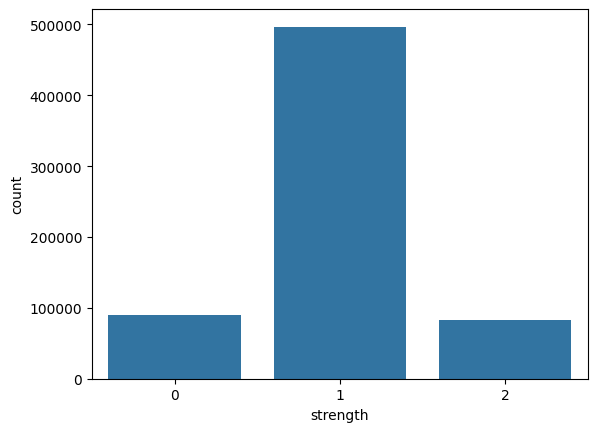

In [10]:
sns.countplot(x = 'strength', data = df)

In [11]:
x = df['password']

y = df['strength']

In [12]:
x

0             kzde5577
1             kino3434
2            visi7k1yr
3             megzy123
4          lamborghin1
              ...     
669635      10redtux10
669636       infrared1
669637    184520socram
669638       marken22a
669639        fxx4pw4g
Name: password, Length: 669639, dtype: object

In [13]:
y

0         1
1         1
2         1
3         1
4         1
         ..
669635    1
669636    1
669637    1
669638    1
669639    1
Name: strength, Length: 669639, dtype: int64

In [14]:
x.isnull().sum()

0

In [15]:
def character(inputs):
    
    characters = []
    for i in inputs:
        characters.append(i)
        
    return characters 

In [16]:
vec = TfidfVectorizer(tokenizer = character)
x = vec.fit_transform(x)

In [17]:
vec.vocabulary_

{'k': 66,
 'z': 81,
 'd': 59,
 'e': 60,
 '5': 39,
 '7': 41,
 'i': 64,
 'n': 69,
 'o': 70,
 '3': 37,
 '4': 38,
 'v': 77,
 's': 74,
 '1': 35,
 'y': 80,
 'r': 73,
 'm': 68,
 'g': 62,
 '2': 36,
 'l': 67,
 'a': 56,
 'b': 57,
 'h': 63,
 'q': 72,
 'f': 61,
 't': 75,
 'u': 76,
 '6': 40,
 'c': 58,
 '8': 42,
 'w': 78,
 '9': 43,
 '0': 34,
 'j': 65,
 'p': 71,
 '@': 49,
 '-': 31,
 'x': 79,
 '.': 32,
 '>': 47,
 '&': 26,
 '?': 48,
 '<': 45,
 '!': 21,
 ';': 44,
 '_': 54,
 '%': 25,
 '±': 99,
 '"': 22,
 '~': 85,
 '+': 30,
 '^': 53,
 '/': 33,
 '$': 24,
 ')': 28,
 ' ': 20,
 '(': 27,
 '#': 23,
 'ú': 138,
 '*': 29,
 '`': 55,
 '{': 82,
 '}': 84,
 '[': 50,
 ']': 52,
 'þ': 142,
 'ó': 132,
 'ô': 133,
 '=': 46,
 '\\': 51,
 '\x1c': 17,
 '³': 101,
 '¿': 112,
 '\x16': 12,
 'ò': 131,
 '·': 105,
 '\x1e': 19,
 '\x19': 15,
 '\x05': 3,
 '\x1b': 16,
 'å': 120,
 '‚': 147,
 'ä': 119,
 'à': 115,
 'õ': 134,
 'ß': 114,
 '´': 102,
 '«': 96,
 'ð': 129,
 'â': 117,
 '°': 98,
 '|': 83,
 '\x7f': 86,
 '²': 100,
 '¾': 111,
 'ÿ': 143,

In [18]:
x.shape

(669639, 153)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1000)

In [20]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(669639, 153)
(535711, 153)
(133928, 153)


# Logistic Regression

In [21]:
lr = LogisticRegression()

In [22]:
lr.fit(x_train, y_train)

LogisticRegression()

In [23]:
y_pred_test = lr.predict(x_test)

y_pred_train = lr.predict(x_train)

In [24]:
test_acc = accuracy_score(y_test, y_pred_test)

train_acc = accuracy_score(y_train, y_pred_train)

In [25]:
print(test_acc)

print(train_acc)

0.8184920255659758
0.8192756915575748


# Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()

In [ ]:
gb_model.fit(x_train, y_train)

y_pred_gb = gb_model.predict(x_test)

In [ ]:
test_acc_1 = accuracy_score(y_test, y_pred_gb)
test_acc_1

0.9133862971148677

# Data Validation

In [ ]:
user_inp = input()
user_inp = np.array([user_inp])
user_inp = vec.transform(user_inp)

y_pred = gb_model.predict(user_inp)

print(y_pred)

kalyanscrewedyou#847
[2]
